#  <center> Exploratory Data Analysis on Video Game Sales </center> 

## Introduction

<b>Video games are played across the world, now more than ever before.</b><br>

* The aim of this report is to analyse the consumption of video games around the world and consider the trends in the popularity of genres across time.<br>

* The <b>main</b> discoveries are that:<br>

>(1) Video game consumption of the Top 200 games is highest in North America, followed by Europe and Japan<br>

>(2) The Action, Shooter and Platform genres are most popular across all regions, though certain regions further favour particular genres more so than others<br>

>(3) 2010 & 2011 were responsible for the release of the most Top 200 games between 1982-2015<br>

>(4) There has been a decline in the number of recently released games entering the Top 200<br>

>(5) The Action, Shooter and Sports genres have increased in popularity over the years, while Puzzle-Based and Platform games have decreased in popularity<br>

<img src = "https://images.tweaktown.com/news/6/8/68328_99_heres-list-valuable-retro-video-games.png" width=600 height=600/>


* I would like to examine the most sold 100 games in the global perspective, then examine the games in terms of genre and platform, the game publish according to year, the game genres according to the region , to word colud with game names and finally the year the most sold 1000 games are released and their publishers. Also some information are given about games, publishers and platforms.

## Column Description

* In this Dataset there are 11 columns, Their names and data type as follows.*

<b>1) Rank </b> = This column describe Ranking of overall sales and data type is integer.<br>
<b>2) Name </b> = This column describe Games name and data type is object.<br>
<b>3) Platform </b> = This column describe Platform of the games release (i.e. PC,PS4,etc.) and data type is object.<br>
<b>4) Year </b> = This column describe Year's of the games release and data type is float.<br>
<b>5) Genre </b> = This column describe Genre of game and data type is object.<br>
<b>6) Publisher </b> = This column describe Publisher of game and data type is object.<br>
<b>7) NA_Sales </b> = This column describe to how many Games are sales in Nort America(in millions).<br>
<b>8) EU_Sales </b> = This column describe to how many Games are sales in Europe(in millions).<br>
<b>9) JP_Sales </b> = This column describe to how many Games are sales in Japan(in millions).<br>
<b>10) Other_sales </b> = This column describe to hoe many games are sales in rest of the world(in millions).<br>
<b>11) Global_Sales </b>= This column describe to Total worldwide games sales.<br>

## **Importing Required Libraries**

In [1]:
#!pip install plotly

In [4]:
#NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.
import numpy as np

#Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language.
import pandas as pd 

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
sns.set_style("dark")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [8]:
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt 

In [6]:
import statsmodels.api as sm
import matplotlib
import sys

<b>Version Information</b>

In [7]:

print('Python: {}'.format(sys.version[0:5]))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Statsmodels.api: {}'.format(sm.__version__))


Python: 3.7.6
Pandas: 0.25.3
Numpy: 1.17.4
Matplotlib: 3.2.0rc2
Seaborn: 0.9.1.dev0
Statsmodels.api: 0.10.2


In [5]:
import os

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
warnings.filterwarnings('ignore')

In [7]:
#check current working directory
os.getcwd()

'E:\\Python\\WPy64-3760\\notebooks'

## **Load Data**

In [9]:
vgsales = pd.read_csv(r"E:\\vgsales.csv")

In [10]:
#find number of rows and columns in dataset

nr,nc = vgsales.shape[0], vgsales.shape[1]
print(f"There are {nr} rows and {nc} columns in the dataset")

There are 16598 rows and 11 columns in the dataset


**let's look at what columns we have available..**

In [10]:
#information about data
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### What kind of information we have in Video Game Sales?

In [11]:
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
vgsales.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [13]:
#columns of data
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [14]:
vgsales.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
t = pd.DataFrame([[i,vgsales[i].dtype,vgsales[i].unique()]for i in vgsales.columns])
t.columns = ['name','dtype','unique']
t

,name,dtype,unique
0,Rank,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Name,object,"[Wii Sports, Super Mario Bros., Mario Kart Wii..."
2,Platform,object,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ..."
3,Year,float64,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989...."
4,Genre,object,"[Sports, Platform, Racing, Role-Playing, Puzzl..."
5,Publisher,object,"[Nintendo, Microsoft Game Studios, Take-Two In..."
6,NA_Sales,float64,"[41.49, 29.08, 15.85, 15.75, 11.27, 23.2, 11.3..."
7,EU_Sales,float64,"[29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, ..."
8,JP_Sales,float64,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9..."
9,Other_Sales,float64,"[8.46, 0.77, 3.31, 2.96, 1.0, 0.58, 2.9, 2.85,..."


In [16]:
# dataset summary statistics – Integer and numeric variables.
# T means Transpose

vgsales.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


### Null Values

* We do a simple null value check. We could potentially search online for all the missing publication years and publishers but for now we will simply drop the entries for games that do not have all the data.


In [17]:
print(vgsales.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


* **Below we check the number of games (rows) and the number of unique publishers, platforms and genres to get an idea of how our the games in the dataset are distributed categorically.**

In [18]:
print("Number of games: ", len(vgsales))
publishers = vgsales['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = vgsales['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = vgsales['Genre'].unique()
print("Number of genres: ", len(genres))


Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [19]:
#show random rows in dataset
vgsales.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8478,8480,Dungeon Siege: Throne of Agony,PSP,2006.0,Role-Playing,Take-Two Interactive,0.13,0.02,0.00,0.02,0.16
8087,8089,Odin Sphere: Leifthrasir,PS4,2016.0,Role-Playing,Nippon Ichi Software,0.06,0.03,0.07,0.02,0.18
6160,6162,Tales of the World: Radiant Mythology 3,PSP,2011.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.28,0.00,0.28
8190,8192,FIFA 17,X360,2016.0,Sports,Electronic Arts,0.03,0.13,0.00,0.01,0.18
7500,7502,Mary-Kate and Ashley: Girls Night Out,GBA,2002.0,Misc,Acclaim Entertainment,0.15,0.05,0.00,0.00,0.20


## **Graph**

<b><i>1) Game sales Golbally per year</i></b>

&nbsp; We create a simple column chart to represent the total 'Global_Sales' of video games per year. We get our data by data our dataframe of all video games sales, grouping it by 'Year' and then calling .sum() to get totals for each year. This creates a dataframe with our years as the index or row names and the entries our total sales for that year.

&nbsp; In the dataset, the index representing years are floating point numbers eg "2006.0" not "2006". We get our x entries by taking these values as integers.

&nbsp; Once data is ready we simply pass our x and y variables to our Seaborn barplot function. We also set our x-label names, the title and we also rotate our xticklabels and change their fontsize.<br>



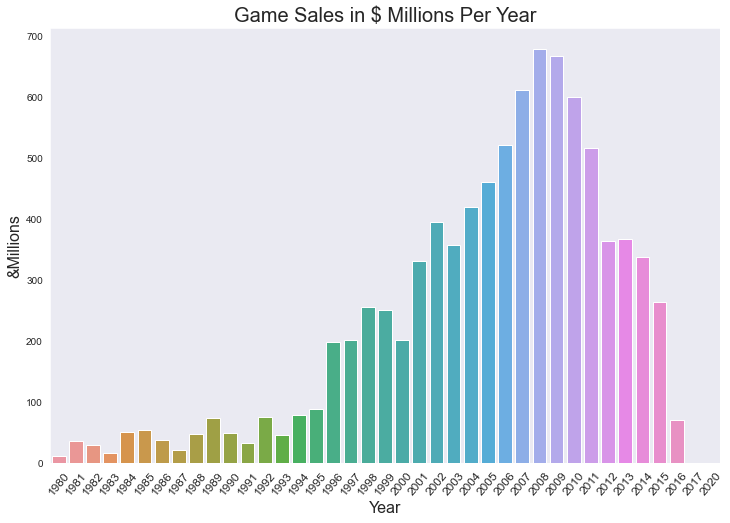

In [20]:
y = vgsales.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='&Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

<br><b><i>2) Game Release per year</i></b>

&nbsp; &nbsp;We create a simple column chart to represent the total number of releases of video games per year, but with a twist, it is oriented horizontally, which means our Year entries, which usually would be our X-axis, are now on the Y-axis and the count of 'Global_Sales' entries, which would usually be on the Y-axis, are now on the X-axis.

&nbsp; &nbsp;The below chart that represents the number of games released each year is constructed in the same way as the above chart, with the only difference being we count the entries per year instead of summing them.

&nbsp; &nbsp;We also introduce the 'palette' parameter of Seaborn's barplot that can be used to personally tune colour schemes but also comes with a large number of preset palettes.<br>

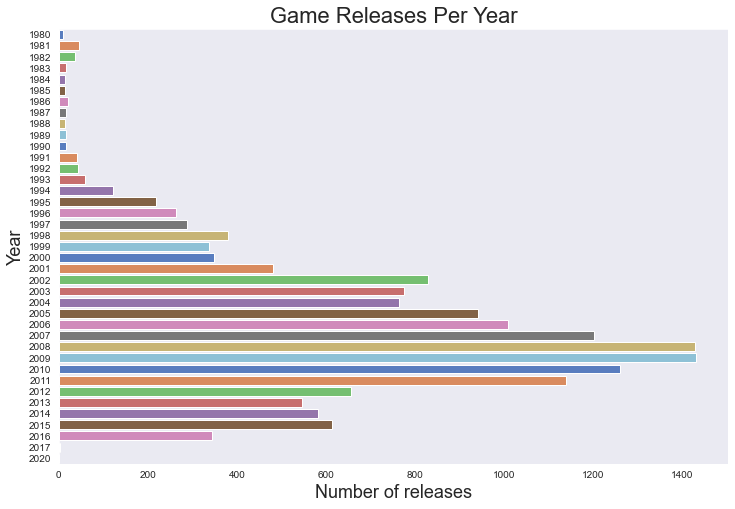

In [21]:
x = vgsales.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=18)
ax.set_ylabel(ylabel='Year', fontsize=18)
ax.set_title(label='Game Releases Per Year', fontsize=22)
plt.show();

<br><b><i>3) Game Sales in North America per Year</i></b>

&nbsp; &nbsp;We create a simple column chart to represent the total number of releases of video games per year, but with a twist, it is oriented vertically, which means our Year entries, which usually would be our y-axis, are now on the x-axis and the count of 'NA_Sales' entries, which would usually be on the x-axis, are now on the y-axis.

&nbsp; &nbsp;The below chart that represents the number of games released each year is constructed in the same way as the above chart, with the only difference being we count the entries per year instead of summing them.

&nbsp; &nbsp;We also introduce the 'palette' parameter of Seaborn's barplot that can be used to personally tune colour schemes but also comes with a large number of preset palettes.

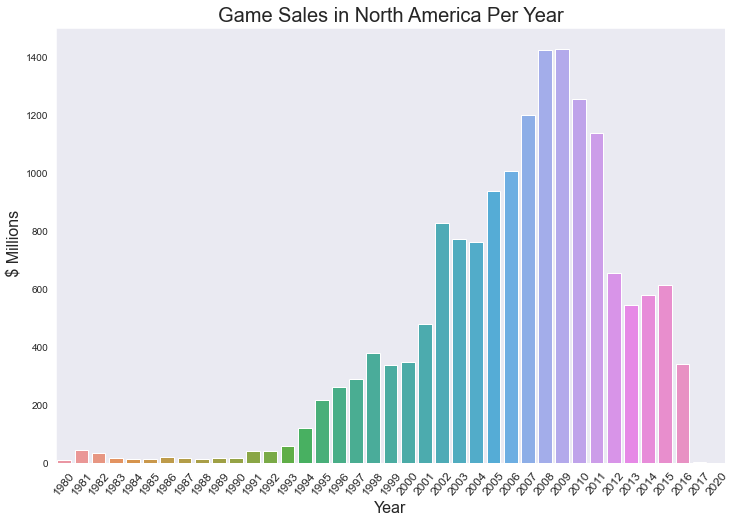

In [22]:
y = vgsales.groupby(['Year']).count()
y = y['NA_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel=' $ Millions', fontsize=16)
ax.set_title(label='Game Sales in North America Per Year', fontsize=20)
plt.show();

<br><b><i>4) Highest publisher revenue Globally sales per year</i></b>

<p>We create a pointplot with the highest Sales per Publisher each year. Global sales is on the Y-axis, years on the X-axis and we represent the highest Publisher by using the pointplot's parameter "hue". We use a pivot table which makes it easy to calculate "publishers", the names of the highest publisher by sales for each year and "sales", the global sales generated by that publisher for each year. Notice that the pivot table takes a parameter for function to apply which has other options like mean, median and mode.</p>

<p>The pointplot takes a dataframe and then you can easily just add the column names to x and y and hue. We also customize our xticklabels by rotating then and changing their size.</p>


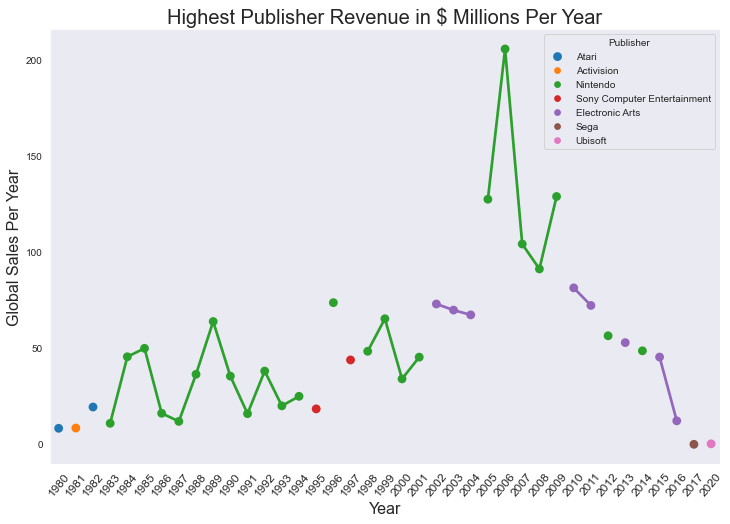

,Publisher,Global Sales
Year,,
1980.0,Atari,8.36
1981.0,Activision,8.50
1982.0,Atari,19.43
1983.0,Nintendo,10.96
1984.0,Nintendo,45.56
1985.0,Nintendo,49.95
1986.0,Nintendo,16.18
1987.0,Nintendo,11.95
1988.0,Nintendo,36.44


In [20]:
table = vgsales.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')
publishers = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([publishers, sales], axis=1)
data.columns = ['Publisher', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Publisher', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Publisher Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();
data

<br><b><i>5) Highest Genre revenue Globally sales per year</i></b>

&nbsp;We plot the highest global sales generated by genre per year in the same way as the above plot. Notice we set the "palette" of our pointplot. 

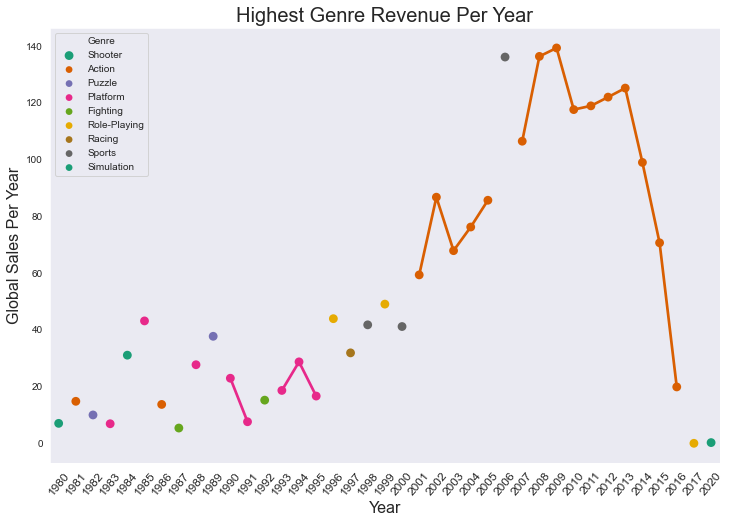

,Genre,Global Sales
Year,,
1980.0,Shooter,7.07
1981.0,Action,14.84
1982.0,Puzzle,10.03
1983.0,Platform,6.93
1984.0,Shooter,31.10
1985.0,Platform,43.17
1986.0,Action,13.74
1987.0,Fighting,5.42
1988.0,Platform,27.73


In [24]:
table = vgsales.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Genre', data=data, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();
data

<br><b><i>6) Highest Games revenue Globally sales per year</i></b>

&nbsp; &nbsp;We create a barplot of the Global Sales generated by the game that makes the most money each year. We also return a dataframe below for reference. One could potentially map different colours to each game but adding a legend to a plot with so many entries can make a plot look messy.

&nbsp; &nbsp;The data creation for this plot is similar to that above, excluding the use of hue to represent categories in our data. Instead we use a colour palette, passing it the number of colours in that particular colour palette that we want.

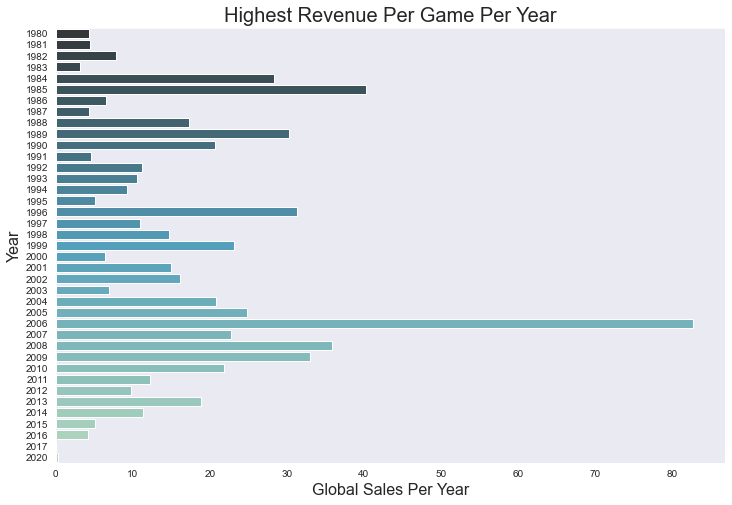

,Game,Global Sales
Year,,
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280


In [25]:
table = vgsales.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global Sales']


colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game Per Year', fontsize=20)
plt.show();
data

<br><b><i>7) Highest Platform revenue in per year</i></b>

&nbsp; &nbsp;We plot the platform with the highest total platform sales per year very similarly to the other pointplots above.


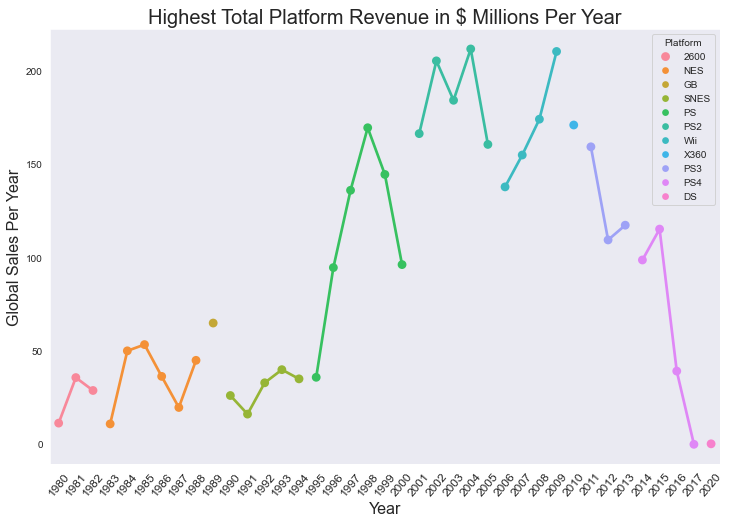

,Platform,Global Sales
Year,,
1980.0,2600,11.38
1981.0,2600,35.77
1982.0,2600,28.86
1983.0,NES,10.96
1984.0,NES,50.09
1985.0,NES,53.44
1986.0,NES,36.41
1987.0,NES,19.76
1988.0,NES,45.01


In [26]:
table = vgsales.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platforms = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([platforms, sales], axis=1)
data.columns = ['Platform', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Platform', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();
data

<br><b><i>8) Top 10 Publisher Games Released</i></b>

&nbsp; &nbsp;We create 2 plots: the top 10 publishers by the number of games they have released and the total sales generated, the only difference being the we apply count() in the first instance and sum() in the second.

&nbsp; &nbsp;We groupby 'Publisher', choose a single column, sort in descending order and then choose the top 10 values. We also apply the sequential colourmaps "spring" and "cool" to our plots.


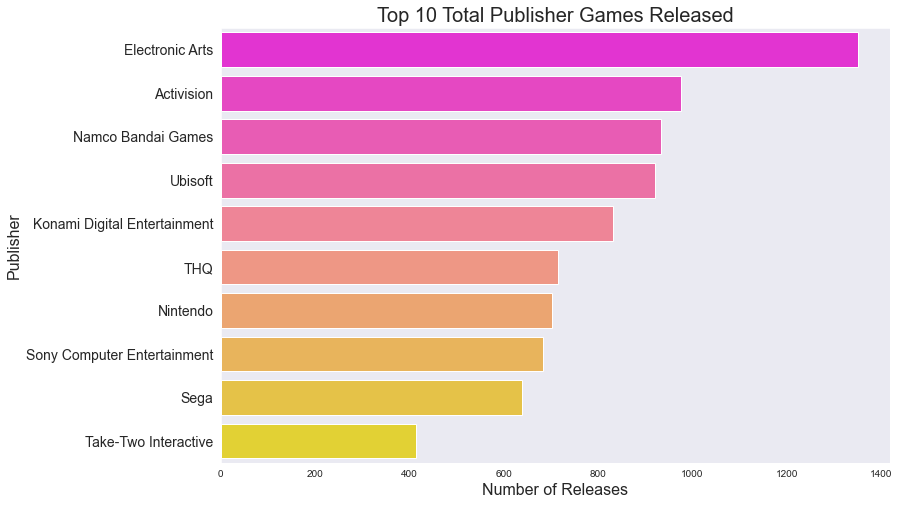

In [27]:
data = vgsales.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

<br><b><i>9)Genres by Total Number of Games Released</i></b>

&nbsp; &nbsp;We create three plots for genres: total number of games released, total revenue generated and revenue per game released. We compute revenue per game by concetenating our total revenue generated and games released dataframes and then dividing the former column by the latter to get Revenue/Release. For our genres, "rel" is the count of number of games released and "rev" is the total revenue generated.

&nbsp; &nbsp;We groupby, apply sum() or count() and choose the first column using .iloc() when we just want to count entries and ['Global_Sales'] when we want to sum sales. Finally we sort our values and then plot our data, testing a couple of different colour palettes.

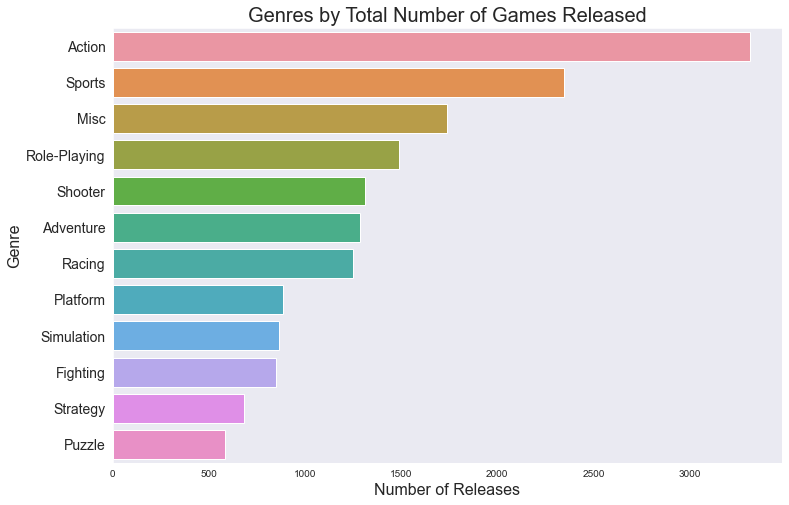

In [28]:
rel = vgsales.groupby(['Genre']).count().iloc[:,0]
rel = pd.DataFrame(rel.sort_values(ascending=False))
genres = rel.index
rel.columns = ['Releases']

colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Releases', data=rel, orient='h')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

<br><b><i>10)Total Revenue Generated by Region </i></b>

&nbsp; &nbsp;We plot the total revenue generated by the four regions that the "Global_Sales" column is made up of: namely, the Europe, Japan, North America and other.

&nbsp; &nbsp;First we sum all the columns in our original dataframe. Then we create a dataframe which has regions by selecting columns from our summed data variable. We also create our own regions index because we want the full names for the regions in our plots, not "EU_Sales" etc.

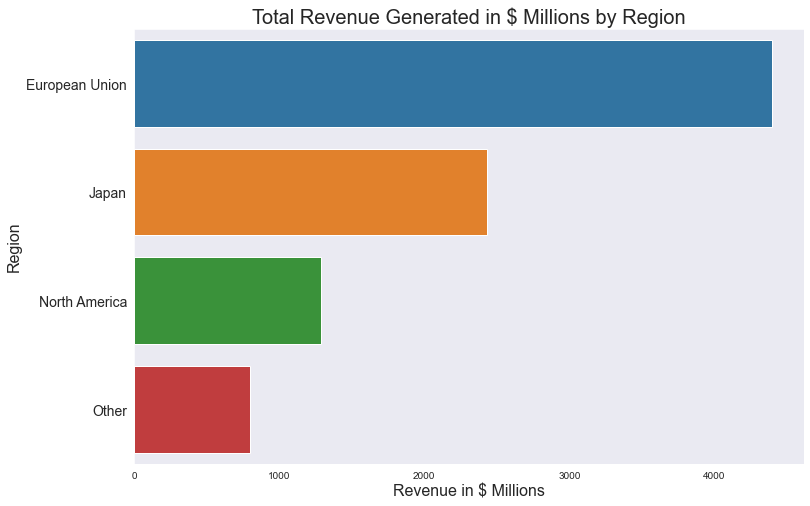

In [46]:
data = vgsales.sum()
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']])
regions = ['European Union', 'Japan', 'North America', 'Other']
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12,8))
colors = sns.color_palette("Dark2", len(data))
ax = sns.barplot(y = regions , x = 'Revenue', data=data, orient='h')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();

<br><b><i>11) Top 3 Games revenue by Per region</i></b>

&nbsp; &nbsp;Below, we first define a function that will make it easier to use Seaborn's barplot as subplots. For a single row of barplot subplots, the function takes an axes object and turns off the xlabels and ylabels to make our final plot cleaner.

&nbsp; &nbsp;We then create pivot tables for the sum of sales by Games per region, sort in descending order and then select the top 3. We create our own colour palette(dictionary) which matches all the top three entries for our regional dataframes using the named colours from https://xkcd.com/color/rgb/.

&nbsp; &nbsp;We create our subplots add subplots in the format: fig.add_subplot('rows', 'columns', 'plot number') Therefore "fig.add_subplot(1,4,1)" means one row of four subplots, this plot being the first. We create our four subplots seperately. The first subplot differs from the following three in that our turn_off_labels() function is called without the additional "first=False" parameter.

In [30]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)


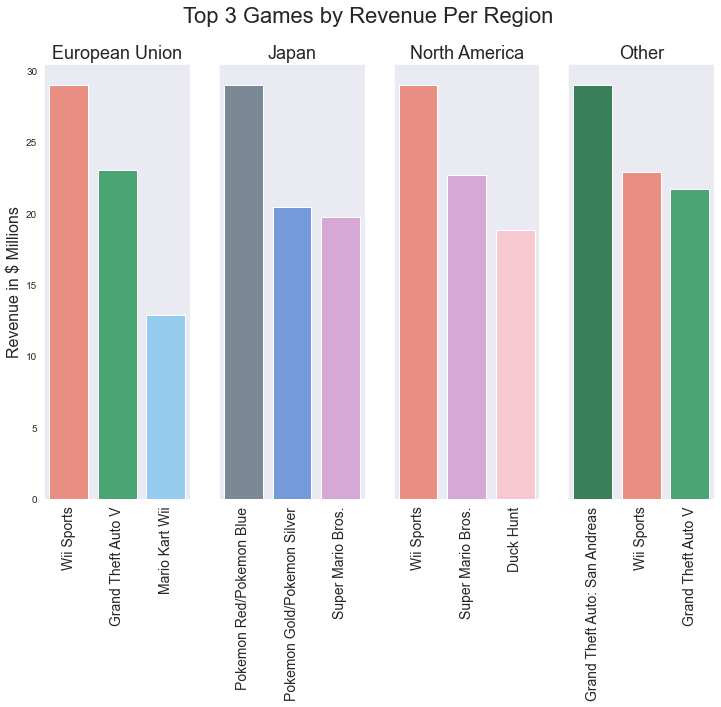

In [31]:
EU = vgsales.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_games = EU.index

JP = vgsales.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_games = JP.index

NA = vgsales.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_games = NA.index

Other = vgsales.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_games = Other.index

colors =  {'Wii Sports':"salmon", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':
           "lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"plum", 'Duck Hunt':"pink", 
           'Grand Theft Auto: San Andreas':"seagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_games, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_games, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_games, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_games, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_games, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_games, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_games, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();


<br><b><i>12) Top 3 Publishers by Revenue Per Region</i></b>

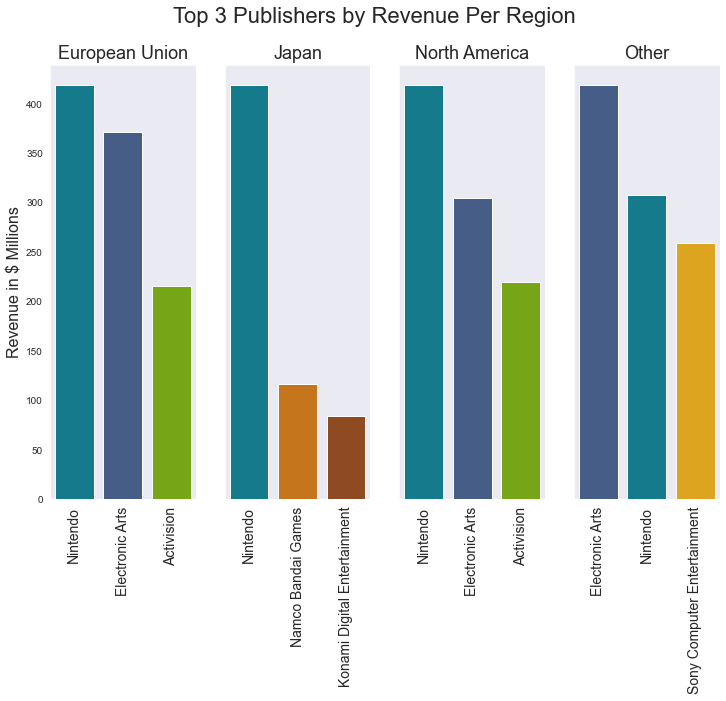

In [32]:
EU = vgsales.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = vgsales.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = vgsales.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = vgsales.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

<br><b><bi>13)Top 3 Genres by Revenue Per Region </i></b>

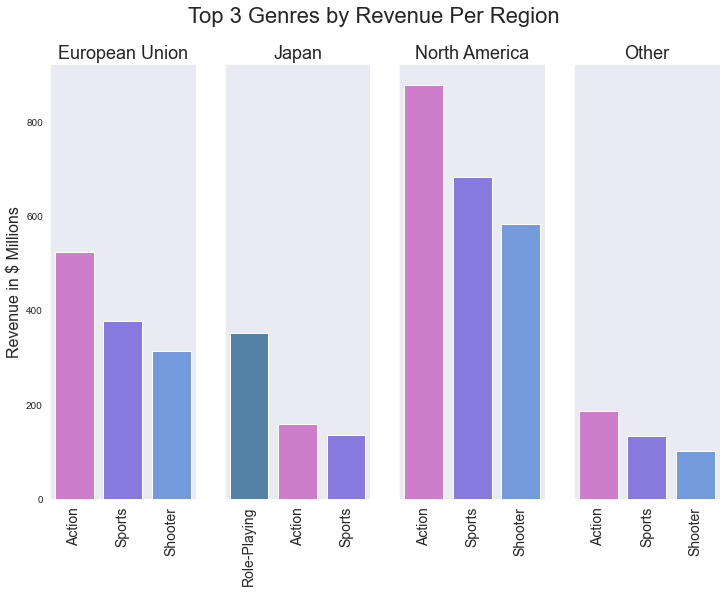

In [33]:
EU = vgsales.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = vgsales.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

NA = vgsales.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

Other = vgsales.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();

<br><b><i>14) Distributive of Revenue Per Genre by Year in milions </i></b>

&nbsp; &nbsp;We plot the distribution of game sales for every year from 1980-2020 similarly to the way we plotted distribution of sales by region above.<br>

&nbsp; &nbsp;We create a pivot table with 'Global_Sales' seperated by year, for every entry in our dataset. We once again set our percentile so that it is easier to visualize the distribution of the majority of data without outliers.


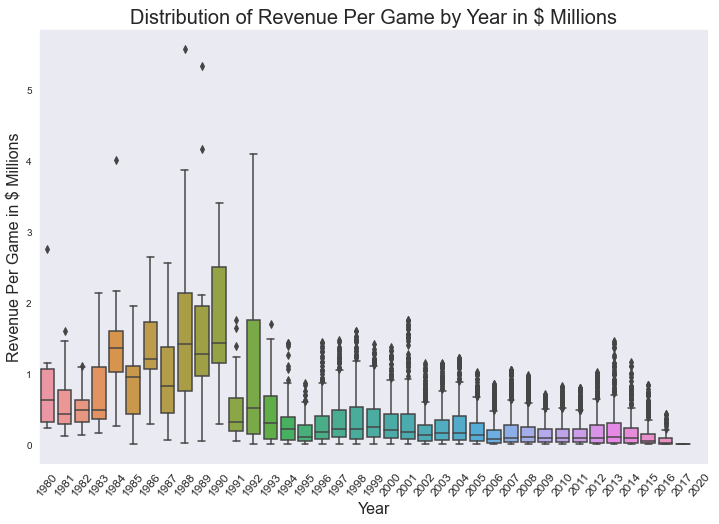

In [34]:
table = vgsales.pivot_table('Global_Sales', columns='Year', index='Name')
q = table.quantile(0.90)
data = table[table < q]
years = table.columns.astype(int)

plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Game by Year in $ Millions', fontsize=20)
plt.show()
plt.show()

<br><b><i>15) Distributive of Sales per Games in $millions per Region </i></b>

 We plot the distribution of game sales by region. To do this we need create a data variable which has, as columns, region and has entries for each game (all 16598) in the same was as above, just without using .sum() and by adding .T ("transpose" which swaps rows for columns).

 We also create the variable "q" so that we can select only the data that falls within the 90th percentile, which excludes outliers, making it easier for us to observe the distribution of the majority of our data.


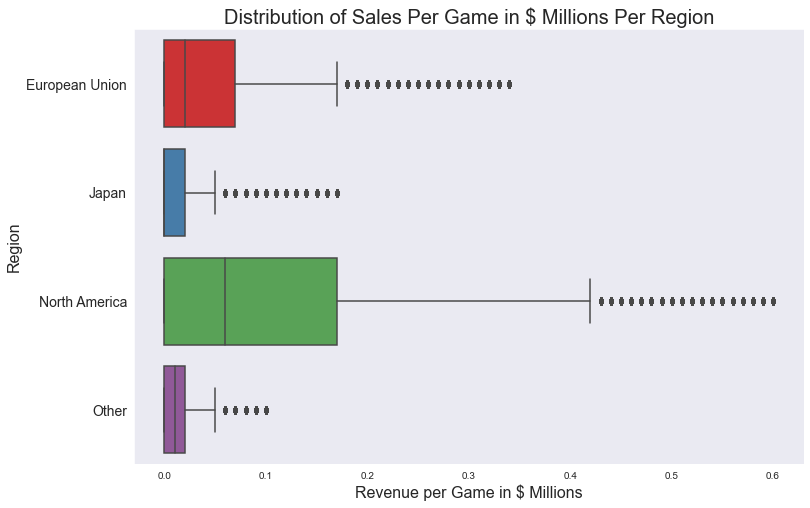

In [35]:
data = vgsales
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

<br><b><i>16)Distributive of total revenue per Region by Year</i></b>

&nbsp; &nbsp;We create a pointplot of total sales by region per year. To do this we create four pivot tables that have sales with years as index and game names as columns. We then do another row-wise sum on these pivot tables to get the sum of games sales for that particular year for that particular region.

&nbsp; &nbsp;We then call Seaborn's pointplot four times, passing the dataframe for each region and also setting "scale=..." which adjusts the size of the points in our plot. Note the handling of the legend which, although not very intuitive, can be used with other data by replacing "years" in ax.legend(...) with your index and "regions" with the labels of your plots. Sometimes this cell needs to be run twice before it displays the legend correctly.

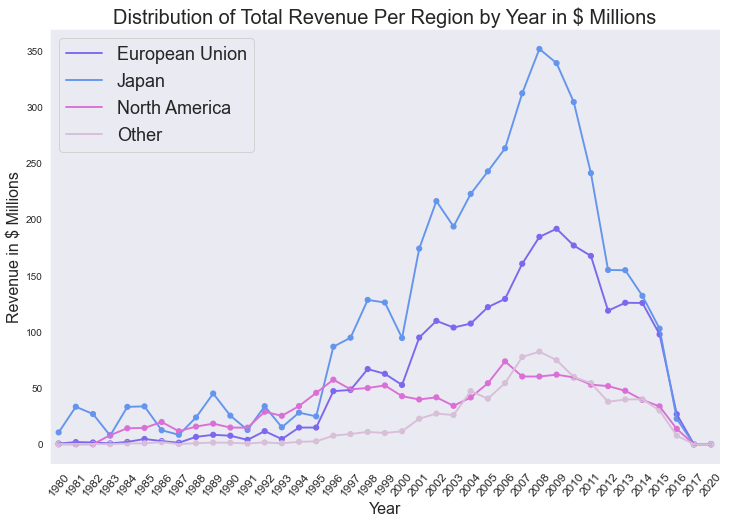

In [36]:
EU = vgsales.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = vgsales.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = vgsales.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = vgsales.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

### **How one feature is related to another feature?**

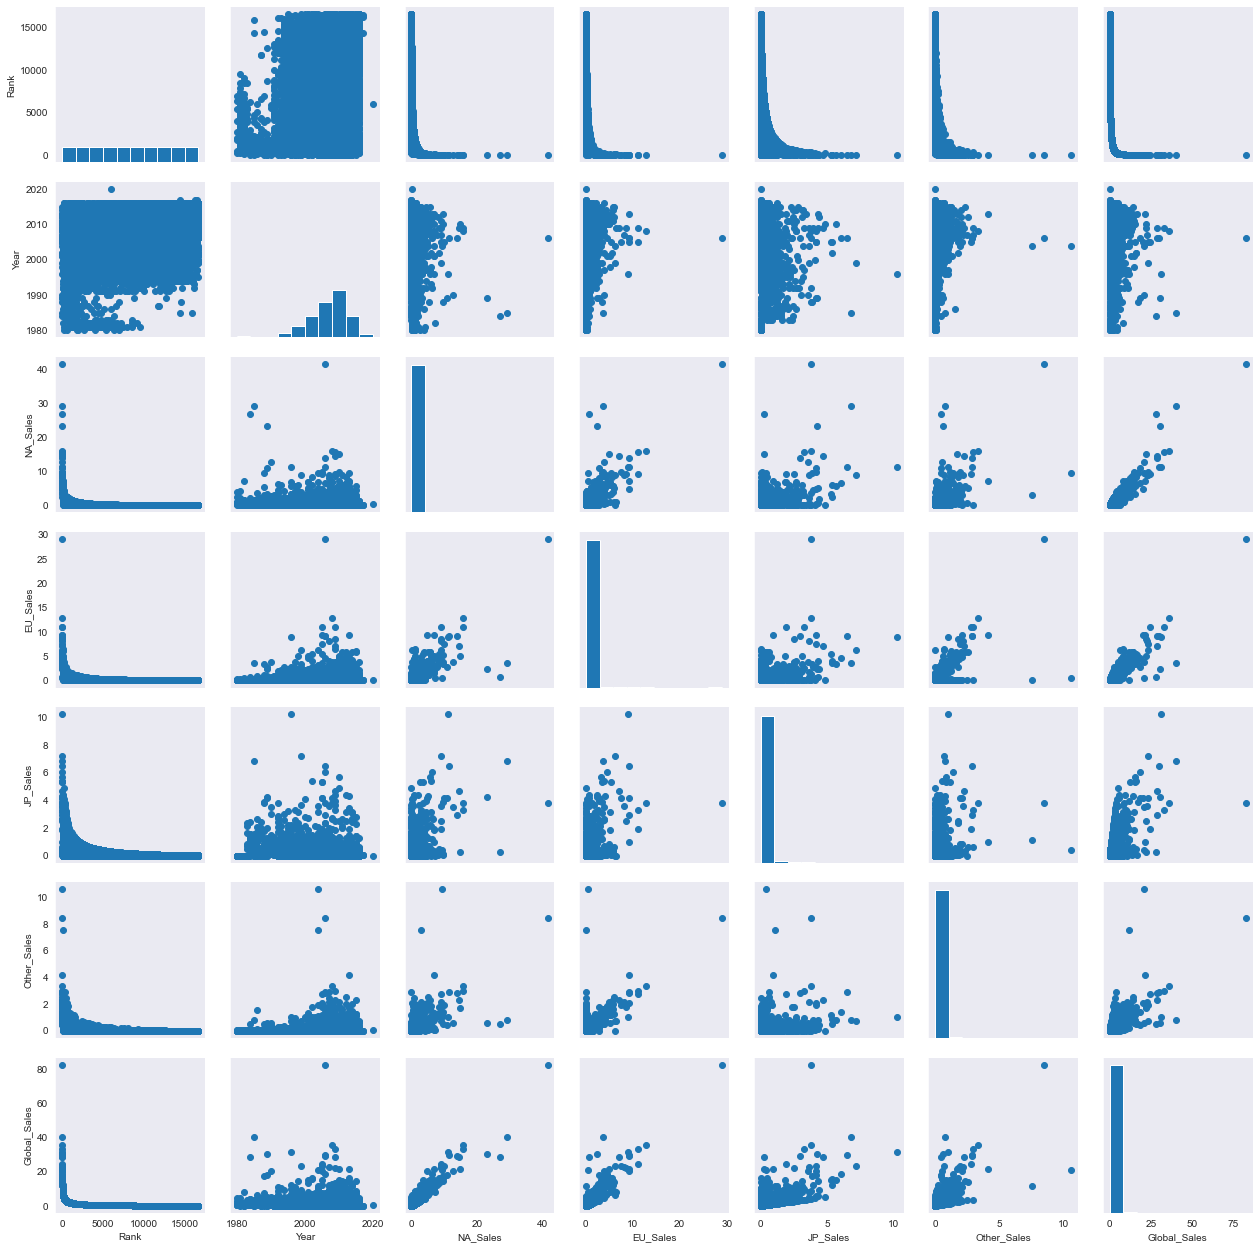

In [37]:
p = sb.PairGrid(vgsales)
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter);

**Below heatmap shows correlation between fetures**

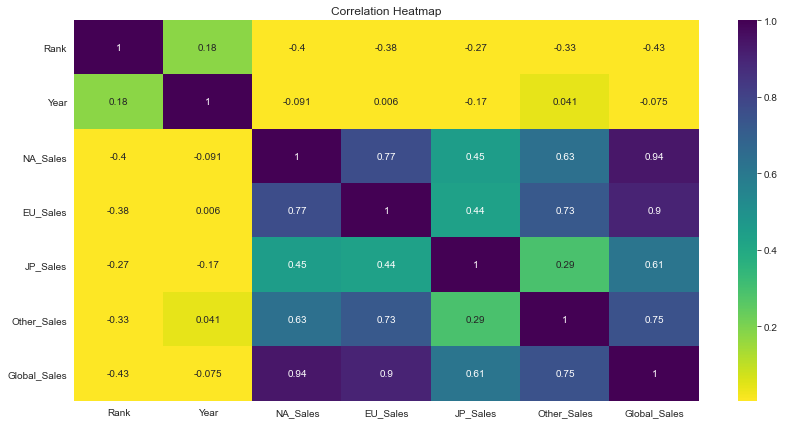

In [24]:
plt.figure(figsize=(14,7))

plt.title("Correlation Heatmap")
sb.heatmap(data=vgsales.corr(), annot=True, vmin=0.005,cmap= 'viridis_r');

### Genre vs Global Sales 

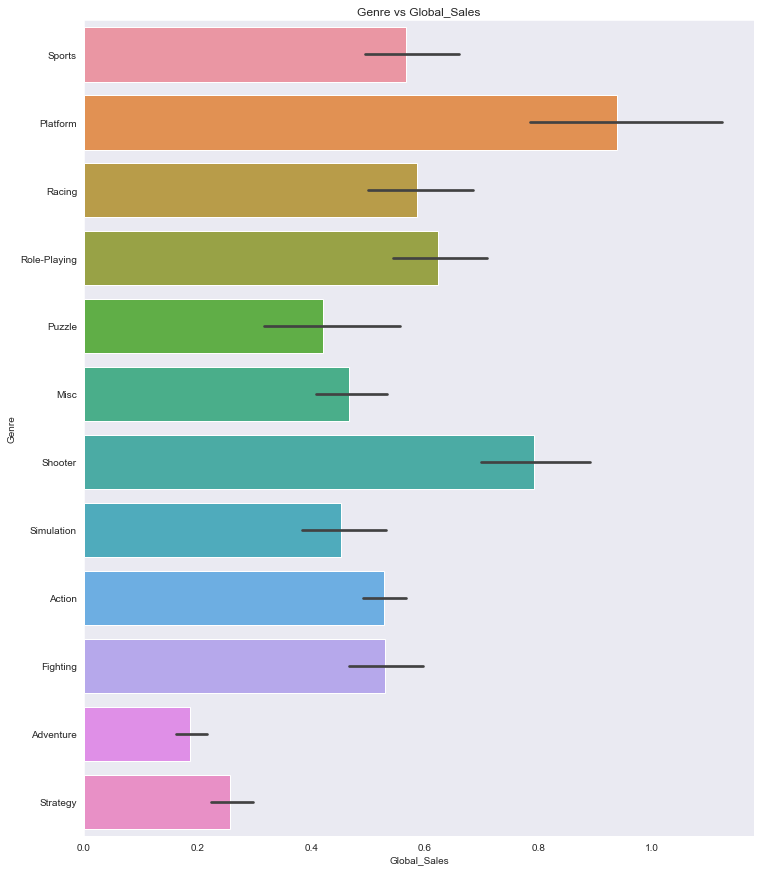

In [38]:
plt.figure(figsize=(12,15))
plt.title('Genre vs Global_Sales')
sb.barplot(data=vgsales.sort_values('Global_Sales', ascending=False), x='Global_Sales', y='Genre');

### *Word Cloud with Game Names*

&nbsp; &nbsp;Word cloud example in the below is based on the names of the game in the data set. Most of the game names in the data set are like "Party", "DS", "Game", "Adventure", "Portable".

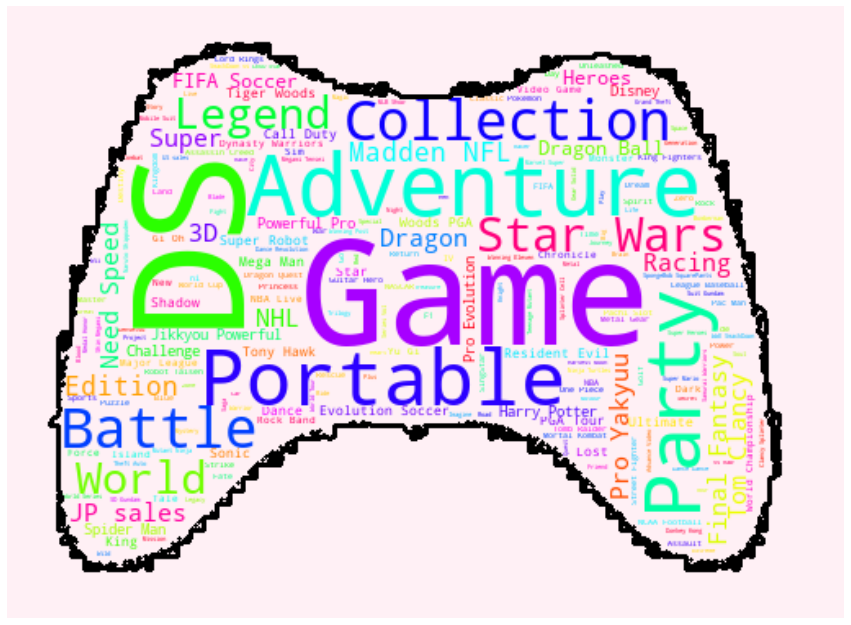

In [40]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
wave_mask= np.array(Image.open("E:/vgimage.jpg"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=900,stopwords=stopwords,
                          height=900
                         ).generate(" ".join(vgsales.Name))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<br>

# Conclusion

(1) &nbsp; Game sales peaked in 2008 and has been decreasing ever since. However, the data is not a representation of overall gaming scene. Modern games focus on free to play platform, dominated by PC games.<br>
(2)&nbsp; The data is flawed since it only takes into account game sales where most revenue from games comes from microtransactions. Again, we did not have the data to show PC games on the rise.<br>
(3)&nbsp; EA, Nintendo, Sony are the last few big companies can manage to survive.<br>
(4)&nbsp; Most bad games die out instantly in the last few years which signify the rise in standard of games.<br>
(5)&nbsp; The analysis focuses on consoles due to the data structure.<br>
(6)&nbsp; In spite of exponential growth in video game over the past few decades, sales of recent releases appear to be lower than that of older games.<br>

Further, the popularity of Sports, Shooter and Action genres has increased significantly.

<br>

# References

(1)&nbsp; VgSales Dataset = (https://www.kaggle.com/gregorut/videogamesales)
<br>(2)&nbsp; Pandas = (https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
<br>(3)&nbsp; Seaborn = (https://www.kaggle.com/neilslab/seaborn-visualization)
<br>(4)&nbsp; Wikipedia = (https://en.wikipedia.org/wiki/Video_game)

<img src = " https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQt5j0-1BJI8D3D9SzXOV7AZoRJTaGzApVmVg&usqp=CAU" width=500 height=500 />